In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
#!pip install xgboost

Data Collection

In [2]:
dataset = pd.read_csv('insurance.csv')
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
dataset.shape

(1338, 7)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Categorical Features: Sex,smoker,region

In [5]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Data Analysis

In [6]:
# statistical Measures of the dataset
dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


C:\Users\Client\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


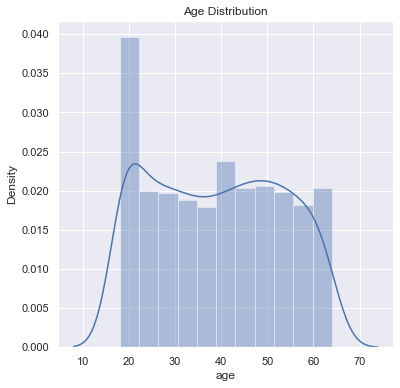

In [7]:
# age distribution
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(dataset['age'])
plt.title('Age Distribution')
plt.show()

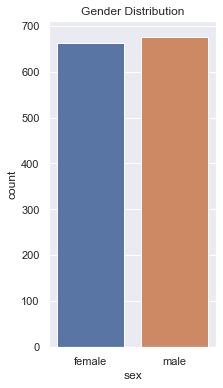

In [8]:
# Gender column
plt.figure(figsize=(3,6))
sns.countplot(x='sex', data=dataset)
plt.title('Gender Distribution')
plt.show()

In [9]:
dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

C:\Users\Client\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


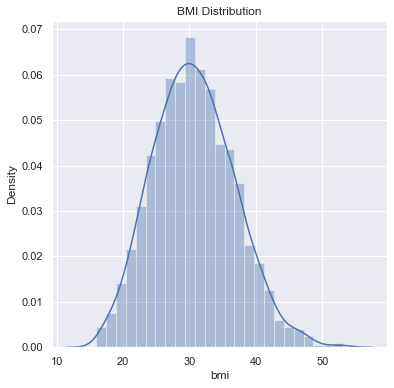

In [10]:
# bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(dataset['bmi'])
plt.title('BMI Distribution')
plt.show()
# Normal BMI range --> 18.5 to 24.9

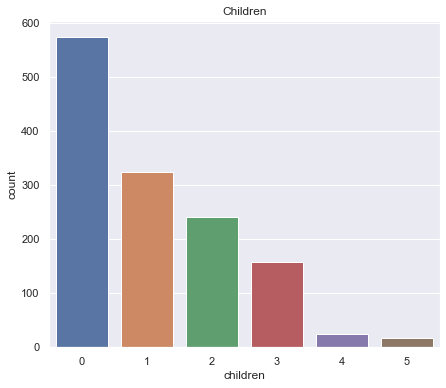

In [11]:
# children column
plt.figure(figsize=(7,6))
sns.countplot(x='children', data=dataset)
plt.title('Children')
plt.show()

In [12]:
dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

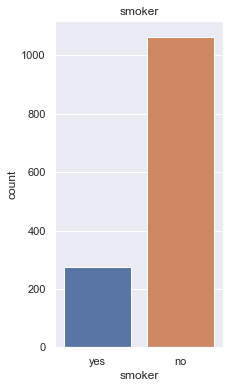

In [13]:
# smoker column
plt.figure(figsize=(3,6))
sns.countplot(x='smoker', data=dataset)
plt.title('smoker')
plt.show()

In [14]:
dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

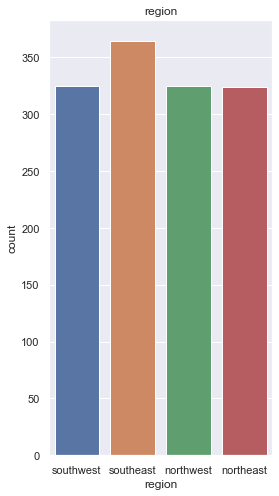

In [15]:
# region column
plt.figure(figsize=(4,8))
sns.countplot(x='region', data=dataset)
plt.title('region')
plt.show()

In [16]:
dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

C:\Users\Client\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


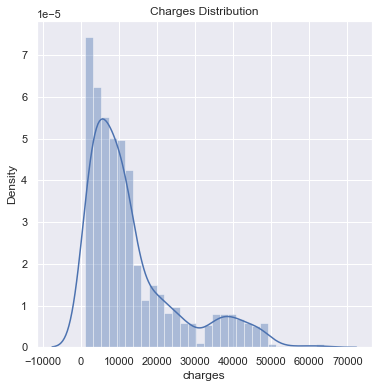

In [17]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(dataset['charges'])
plt.title('Charges Distribution')
plt.show()

Data Pre-Processing

In [18]:
# encoding sex column
dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)

# encoding 'smoker' column
dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)

# encoding 'region' column
dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

Model Training

In [19]:
X = dataset.drop(columns='charges', axis=1)
y = dataset['charges']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [21]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1070, 6) (268, 6)


In [22]:
xgb_model = XGBRegressor().fit(X_train, y_train)

Model Evaluation

In [23]:
y_pred = xgb_model.predict(X_test)

In [24]:
r2 = r2_score(y_test, y_pred)
print('R squared value : ', r2)

R squared value :  0.8217591365018906


Model Hyperparameter Tuning and Optimization

In [25]:
xgb_gird = {
    'colsample_bytree' : [0.3, 0.5, 0.7 , 0.9, 1],
    'n_estimators' : [100 ,200 ,500, 1000],
    'max_depth' : [1,2,3, 4, 5, 6, 8, 10, 12, 15],
    'learning_rate' : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30]
}

In [26]:
xgb = XGBRegressor()
xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_gird, 
                      cv = 10,
                      n_jobs = -1,
                      verbose = 2)
xgb_cv.fit(X_train, y_train)

Fitting 10 folds for each of 1200 candidates, totalling 12000 fits


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_ca...
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                              

In [27]:
xgb_cv.best_params_

{'colsample_bytree': 1,
 'learning_rate': 0.05,
 'max_depth': 3,
 'n_estimators': 100}

In [28]:
xgb_tuned = XGBRegressor(colsample_bytree = 1,
                         learning_rate = 0.05,
                         max_depth = 3,
                         n_estimators = 100)
xgb_tuned = xgb_tuned.fit(X_train, y_train)

In [29]:
y_pred = xgb_tuned.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('R squared value : ', r2)

R squared value :  0.8728466302275435


Building a Predictive System

In [32]:
input_data = (31,1,25.74,0,1,0)
input_numpy_array = np.asarray(input_data)
input_data_reshaped = input_numpy_array.reshape(1,-1)
pred = xgb_tuned.predict(input_data_reshaped)
print('The insurance cost is USD ', pred[0])

The insurance cost is USD  4120.4653
